In [3]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from convert_fm import convert_img_ppm_to_Hz_data, convert_ppm_data_to_Hz_data
from demod import demod_pls
from extract_metric import extract_metrics

# <span style="color:orange"> *db0_032 processing* </span> 

In [1]:
path_to_fms = "E:/msc_data/ismrm_2025/db0_032/fm/sim/fms"
path_to_dmod_mask = "E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask.nii.gz"
path_to_labeled_cord = "E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz"
path_to_metrics = "E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics"
path_to_dmod_folder = "E:/msc_data/ismrm_2025/db0_032/fm/sim/dmod_sim"

## Measured B0 - Inspiration & Expiration

### <span style="color:green"> Expiration </span> 

In [4]:
path_to_exp_meas = "E:/msc_data/ismrm_2025/db0_032/fm/C1_meas/exp/tests/test6_pro/B0.nii"
path_to_exp_dmod_mask = "E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/exp/label_vert/cord_mask.nii.gz"
path_to_exp_metric_mask = "E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/exp/label_vert/cord_mask_labeled.nii.gz"

In [6]:
# Load images and get nifti data to manipulate!
exp_B0_meas_img = nib.load(path_to_exp_meas)
exp_B0_meas_data = exp_B0_meas_img.get_fdata()

exp_dmod_mask_img = nib.load(path_to_exp_dmod_mask)
exp_dmod_mask_data = exp_dmod_mask_img.get_fdata()

exp_metric_mask_img = nib.load(path_to_exp_metric_mask)
exp_metric_mask_data = exp_metric_mask_img.get_fdata()


In [11]:
exp_dmod_value = np.mean(exp_B0_meas_data[exp_dmod_mask_data==1])
print("Expiration demod value: ",exp_dmod_value," Hz")

Expiration demod value:  -237.49879980185443  Hz


In [12]:
exp_dmod_B0_meas = exp_B0_meas_data - exp_dmod_value
# Create nifti and save
exp_dmod_B0_meas_img = nib.Nifti1Image(exp_dmod_B0_meas, affine = exp_B0_meas_img.affine)
path_to_exp_dmod_fm = "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_dmod_B0_meas_test.nii.gz"
nib.save(exp_dmod_B0_meas_img,path_to_exp_dmod_fm)

In [14]:
# Extract metrics, plot and save value
exp_B0_metrics_path =  "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_metrics_test2.csv"
extract_metrics(path_to_exp_dmod_fm, path_to_exp_dmod_mask, path_to_exp_metric_mask, exp_B0_metrics_path, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_dmod_B0_meas_test.nii.gz -f E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/exp/label_vert/cord_mask.nii.gz -method wa -vert 4:15 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/exp/label_vert/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_metrics_test2.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_metrics_test2.csv




In [4]:
exp_B0_metrics_path =  "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_metrics.csv"
exp_metrics_df = pd.read_csv(exp_B0_metrics_path)
exp_metrics_data = exp_metrics_df['WA()']
exp_metrics_data = exp_metrics_data[::-1]
exp_metrics_data

12   -133.966738
11   -121.118786
10    -80.314337
9      -8.943227
8      55.167182
7      39.844835
6     -12.995903
5      -8.459881
4      22.489457
3      56.544607
2      63.354887
1      41.714478
0      19.229226
Name: WA(), dtype: float64

In [6]:
# For this case exp and insp go from 4 to 16 so we gotta add None to C3
#exp_metrics_data_comp = pd.concat([exp_metrics_data, pd.Series([None])]).reset_index(drop=True)
#exp_metrics_data_comp

### <span style="color:red"> Inspiration </span> 

In [5]:
path_to_insp_meas = "E:/msc_data/ismrm_2025/db0_032/fm/C1_meas/insp/tests/test6_pro/B0.nii"
path_to_insp_dmod_mask = "E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/insp/test_new_pipeline/cord_mask.nii.gz"
path_to_insp_metric_mask = "E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/insp/test_new_pipeline/cord_mask_labeled.nii.gz"

# For results
insp_B0_metrics_path = "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_metrics.csv"

In [8]:
# Load images and get nifti data to manipulate!
insp_B0_meas_img = nib.load(path_to_insp_meas)
insp_B0_meas_data = insp_B0_meas_img.get_fdata()

insp_dmod_mask_img = nib.load(path_to_insp_dmod_mask)
insp_dmod_mask_data = insp_dmod_mask_img.get_fdata()

insp_metric_mask_img = nib.load(path_to_insp_metric_mask)
insp_metric_mask_data = insp_metric_mask_img.get_fdata()

In [12]:
insp_dmod_value = np.mean(insp_B0_meas_data[insp_dmod_mask_data==1])
print("Inspiration demod value: ",insp_dmod_value," Hz")

Inspiration demod value:  -226.22557016176847  Hz


In [13]:
insp_dmod_B0_meas = insp_B0_meas_data - insp_dmod_value
# Create nifti and save
insp_dmod_B0_meas_img = nib.Nifti1Image(insp_dmod_B0_meas, affine = insp_B0_meas_img.affine)
path_to_insp_dmod_fm = "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_dmod_B0_meas_test.nii.gz"
nib.save(insp_dmod_B0_meas_img, path_to_insp_dmod_fm)

In [14]:
insp_B0_metrics_path = "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_metrics_test.csv"
extract_metrics(path_to_insp_dmod_fm, path_to_insp_dmod_mask, path_to_insp_metric_mask, insp_B0_metrics_path, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_dmod_B0_meas_test.nii.gz -f E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/insp/test_new_pipeline/cord_mask.nii.gz -method wa -vert 3:15 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/insp/test_new_pipeline/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_metrics_test.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_metrics_test.csv




In [6]:
insp_B0_metrics_path = "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_metrics.csv"
insp_metrics_df = pd.read_csv(insp_B0_metrics_path)
insp_metrics_data = insp_metrics_df['WA()']
insp_metrics_data = insp_metrics_data[::-1]
insp_metrics_data

12   -106.765630
11    -78.994747
10     -3.712555
9      95.571609
8     153.102335
7      95.810823
6     -12.150226
5     -53.264191
4     -43.344680
3     -21.873568
2     -11.487829
1     -11.175013
0     -26.279172
Name: WA(), dtype: float64

In [11]:
# For this case exp and insp go from 4 to 16 so we gotta add None to C3
#insp_metrics_data_comp = pd.concat([insp_metrics_data, pd.Series([None])]).reset_index(drop=True)
#insp_metrics_data_comp

### <span style="color:#C28AD1"> Average Insp and Exp </span> 

In [8]:
avg_respiration = (exp_metrics_data+ insp_metrics_data )/2
avg_respiration

12   -120.366184
11   -100.056767
10    -42.013446
9      43.314191
8     104.134758
7      67.827829
6     -12.573064
5     -30.862036
4     -10.427612
3      17.335520
2      25.933529
1      15.269733
0      -3.524973
Name: WA(), dtype: float64

In [15]:
# Export average!
avg_respiration.to_csv("E:/msc_data/ismrm_2025/db0_032/fm/C1_meas/raw_avg_respiration.csv" , index = False, header = True)

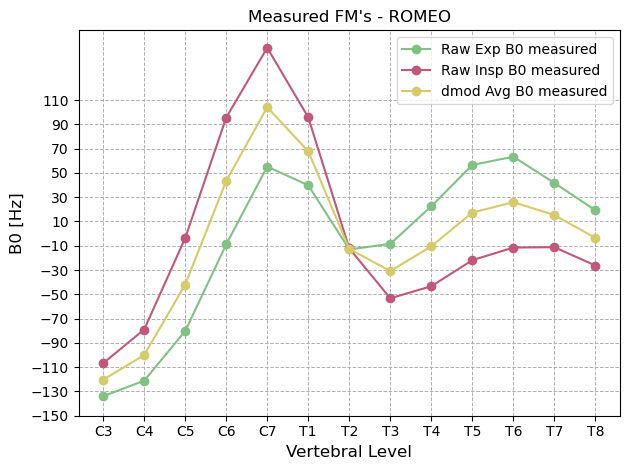

In [9]:
vertebrae_levels = ['C3','C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7','T8'] # From 3 to 14
plt.plot(vertebrae_levels, exp_metrics_data, marker = 'o', linestyle = '-', label = "Raw Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, insp_metrics_data, marker = 'o', linestyle = '-', label = "Raw Insp B0 measured", color = "#C1577B")
plt.plot(vertebrae_levels, avg_respiration, marker = 'o', linestyle = '-', label = "dmod Avg B0 measured", color = "#D5CB6A")

plt.title("Measured FM's - ROMEO")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

yticks = range(-150, 121, 20) 
plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


### Simualted FM loading, demod, extract metric and plot!
The path_to_fm variable will contain 1 to n number of fms that we want to extract, demodulated and extract metrics

In [10]:
from utils.show_slice import display_nifti_slice
from convert_fm import convert_ppm_data_to_Hz_data
from extract_metric import extract_metrics
import re

dmod_mask_img = nib.load(path_to_dmod_mask)
dmod_mask_data = dmod_mask_img.get_fdata()

metric_mask_img = nib.load(path_to_labeled_cord)
metric_mask_data = metric_mask_img.get_fdata()


In [129]:
phrase = "ppm"

for filename in os.listdir(path_to_fms):
    path_to_curr_fm = os.path.join(path_to_fms, filename)
    current_fm_img = nib.load(path_to_curr_fm)
    current_fm_data = current_fm_img.get_fdata()
    
    #display_nifti_slice(path_to_curr_fm, 470, 'ppm', inf_limit=-5, sup_limit=5, cmap = 'gray')

    # Now, demodulationg by the average over the mask -> demod mask
    demod_value = np.mean(current_fm_data[dmod_mask_data==1])
    print(f"Demod value for {filename}:",demod_value)

    curr_dmod_fm_ppm = current_fm_data - demod_value
    dmod_fm_Hz = convert_ppm_data_to_Hz_data(curr_dmod_fm_ppm,3)

    # Small RE block to update the FM name from ppm to Hz
    match = re.search(re.escape(phrase), filename)

    if match:
        #start, end = match.start(), match.end()
        print(f"Phrase found")
        updated_text = "dmod_" + re.sub(phrase, 'Hz', filename)
        print("New filename:",updated_text)
    else:
        print("Phrase not found.")
        if filename.endswith(".nii.gz"): # Maybe code for .nii later (not urgent)
            base_name = filename[:-7]  # Remove the `.nii.gz`
            extension = ".nii.gz"
        else:
            base_name, extension = os.path.splitext(filename)
                # Add 'Hz' to the base name and retain the extension
        updated_text = "dmod_" + base_name + "_Hz" + extension
        print("New filename:", updated_text)
    
    # Saving the demod fm to its new folder with custom name

    dmod_save_path = os.path.join(path_to_dmod_folder,updated_text)
    dmod_fm_img = nib.Nifti1Image(dmod_fm_Hz, affine = current_fm_img.affine)
    nib.save(dmod_fm_img,dmod_save_path)

    # Now metric extraction + saving and plotting :)

    


Demod value for db0_032_fm_opt_chi_ppm.nii.gz: -2.119983176442465
Phrase found
New filename: dmod_db0_032_fm_opt_chi_Hz.nii.gz
Demod value for db0_032_fm_ppm.nii.gz: -2.123123427725569
Phrase found
New filename: dmod_db0_032_fm_Hz.nii.gz
Demod value for test1_fm.nii.gz: -1.0418373620866774
Phrase not found.
New filename: dmod_test1_fm_Hz.nii.gz


In [130]:
phrase = "ppm"
for filename in os.listdir(path_to_dmod_folder):
    print(filename)
    path_to_dmod_fm = os.path.join(path_to_dmod_folder, filename)
    # Testing extract metric subprocess
    if filename.endswith(".nii.gz"): # Maybe code for .nii later (not urgent)
        base_name = filename[:-7]  # Remove the `.nii.gz`
        extension = ".nii.gz"
    updated_text = "metrics_" + base_name + ".csv"
    outfn = os.path.join(path_to_metrics,updated_text)
    extract_metrics(path_to_dmod_fm, path_to_dmod_mask, path_to_labeled_cord, outfn, method='wa', vert="3:15")


dmod_db0_032_fm_Hz.nii.gz
Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i E:/msc_data/ismrm_2025/db0_032/fm/sim/dmod_sim\dmod_db0_032_fm_Hz.nii.gz -f E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask.nii.gz -method wa -vert 3:16 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics\metrics_dmod_db0_032_fm_Hz.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics\metrics_dmod_db0_032_fm_Hz.csv


dmod_db0_032_fm_opt_chi_Hz.nii.gz
Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i E:/msc_data/ismrm_2025/db0_032/fm/sim/dmod_sim\dmod_db0_032_fm_opt_chi_Hz.nii.gz -f E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask.nii.gz -method wa -vert 3:16 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask_labele

E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics\metrics_dmod_db0_032_fm_Hz.csv
metrics_dmod_db0_032_fm_Hz
E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics\metrics_dmod_db0_032_fm_opt_chi_Hz.csv
metrics_dmod_db0_032_fm_opt_chi_Hz
E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics\metrics_dmod_test1_fm_Hz.csv
metrics_dmod_test1_fm_Hz


<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
C:\Users\User\AppData\Local\Temp\ipykernel_85168\4037477069.py:20: SyntaxWarning: invalid escape sequence '\c'
  tag = f"Dmod Sim dB0_032 $\chi$ tr & L = -4.36"


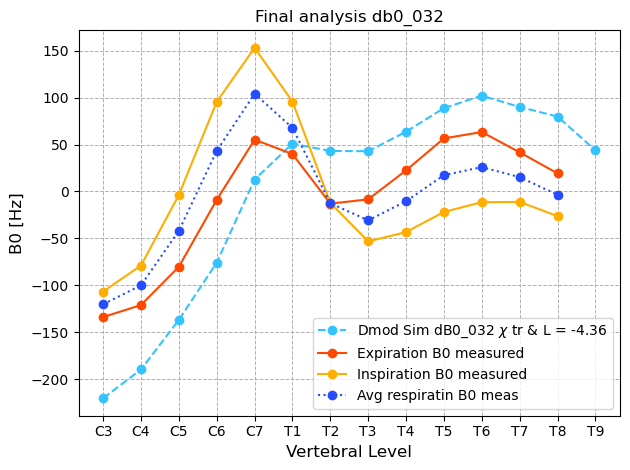

In [28]:
vertebrae_levels = ['C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7','T8', 'T9'] # From 3 to 16
colors = ['#33C3FF','#DBA5FD','#008000','#4d79ff','996633']
color_index = 0
for fn in os.listdir(path_to_metrics):

    #print(fn)
    metric_fn = os.path.join(path_to_metrics,fn)
    print(metric_fn)
    metric_df = pd.read_csv(metric_fn)

    metric_values = metric_df['WA()']
    metric_values = metric_values[::-1]

    if fn.endswith(".csv"): # Maybe code for .nii later (not urgent)
        base_name = fn[:-4]  # Remove the `.nii.gz`
        extension = ".csv"

    print(base_name)
    if base_name == "metrics_dmod_db0_032_fm_opt_chi_Hz":
        tag = f"Dmod Sim dB0_032 $\chi$ tr & L = -4.36"
        plt.plot(vertebrae_levels, metric_values, marker = 'o', linestyle = '--', label = tag, color = colors[color_index % len(colors)]) 
        color_index += 1

# Adding expiration and inspiration measured values
plt.plot(vertebrae_levels, exp_metrics_data_comp, marker = 'o', linestyle = '-', label = "Expiration B0 measured", color = "#ff4900")
plt.plot(vertebrae_levels, insp_metrics_data_comp, marker = 'o', linestyle = '-', label = "Inspiration B0 measured", color = "#ffad00")
plt.plot(vertebrae_levels, avg_respiration_comp, marker = 'o', linestyle = ':', label = "Avg respiratin B0 meas", color = "#264cff")
plt.title("Final analysis db0_032")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()



# <span style="color:#2F67A7"> Testing new demodulation approach* </span> </br>

Done to one subject only to test the hypothesis: </br>
The absolute frequency is: 

$$ f_{abs} = f_{meas} + f_{water} - f_{central}$$

Where the frequency of water depends on the field strength in Tesla and the central frequency is something the scanner sets during load tune-up. The latter can be obtained from the accompanying json sidecar of the echoes.


### <span style="color:green"> Raw expiration </span> </br>
The difference is now we need to get the central frequency value from the json sidecars </br>
For expiration:  123.249521 Hz

The frequency shift of an MR image is given by: deltaF / F0 </br>
F0 is the resonating frequency of spins at the defined Tesla </br>
Recall the gyromagnetic ratio in [Hz/Tesla] is 42.58 1e6 for Hydrogen nuclei </br>
If you don't use the 1e6 in calculations, the final value will be in [ppm]

In [11]:
central_freq_exp_32 = 123.249521 # in MHz

In [8]:
water_Hz_3T = 3 * 42.58 # This comes from Larmor equation, gyromagnetic ratio in MHz/T
print("Frequency of water at 3T: ", water_Hz_3T, "MHz")

Frequency of water at 3T:  127.74 MHz


In [71]:
# We need to apply this to the measured Expiration values
# Lets see what the raw values look like before demodulation
raw_exp_B0_metrics_path = r"E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\exp/raw_exp_metrics.csv"
extract_metrics(path_to_exp_meas, path_to_exp_dmod_mask, path_to_exp_metric_mask, raw_exp_B0_metrics_path, method='wa', vert="5:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/ismrm_2025/db0_032/fm/C1_meas/exp/tests/test6_pro/B0.nii -f E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/exp/label_vert/cord_mask.nii.gz -method wa -vert 5:14 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/exp/label_vert/cord_mask_labeled.nii.gz -perlevel 1 -o E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\exp/raw_exp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\exp/raw_exp_metrics.csv




In [9]:
# Import the data:
# Remember this is from 5 to 14, so its vertebrae levels should start at C5
raw_exp_B0_metrics_path = r"E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\exp/raw_exp_metrics.csv"
raw_exp_metrics_csv = pd.read_csv(raw_exp_B0_metrics_path)

raw_exp_metrics= raw_exp_metrics_csv['WA()']
raw_exp_metrics = raw_exp_metrics[::-1]

raw_exp_metrics 

9   -358.617586
8   -317.813136
7   -250.397042
6   -183.950461
5   -200.534281
4   -250.494702
3   -245.958681
2   -215.009343
1   -180.954193
0   -174.143913
Name: WA(), dtype: float64

### <span style="color:#81DDE7"> Simualted FM loading, demod, extract metric and plot!  </span> 

In [10]:
# Do it on your own terminal and just load
path_to_water_dmod_fm = r"E:\msc_data\ismrm_2025\db0_032\fm\sim\fms/custom_dmod_water_fm_ppm.nii.gz"
path_to_water_dmod_test_results1 = "E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics/water_dmod_test1.csv"
path_to_zero_ref_fm_ppm = r"E:\msc_data\ismrm_2025\db0_032\fm\sim\fms/db0_032_fm_ppm.nii.gz"
path_to_zero_ref_metrics = "E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics/void_ref_ppm_values.csv"

In [70]:
extract_metrics(path_to_water_dmod_fm, path_to_dmod_mask, path_to_labeled_cord, path_to_water_dmod_test_results1, method='wa', vert="5:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:\msc_data\ismrm_2025\db0_032\fm\sim\fms/custom_dmod_water_fm_ppm.nii.gz -f E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask.nii.gz -method wa -vert 5:14 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics/water_dmod_test1.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics/water_dmod_test1.csv




In [16]:
extract_metrics(path_to_zero_ref_fm_ppm, path_to_dmod_mask, path_to_labeled_cord, path_to_zero_ref_metrics, method='wa', vert="5:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:\msc_data\ismrm_2025\db0_032\fm\sim\fms/db0_032_fm_ppm.nii.gz -f E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask.nii.gz -method wa -vert 5:14 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics/void_ref_ppm_values.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics/void_ref_ppm_values.csv




In [13]:
# Import the data:
dmod_water_results = pd.read_csv(path_to_water_dmod_test_results1)

dmod_water_results_csv = dmod_water_results['WA()'][::-1]

central_freq_scan32 = 123.249521 # in MHz same as central_freq_exp_32
gamma_bar = 42.58 # MHz/T
B0_scanner = central_freq_scan32/gamma_bar
print("B0 used this scan: ", B0_scanner, "T")

dmod_water_results_Hz = dmod_water_results_csv*central_freq_scan32
print("Referenced to water chi-dist sim fm Hz:")
print(dmod_water_results_Hz)

B0 used this scan:  2.894540183184594 T
Referenced to water chi-dist sim fm Hz:
9    350.774805
8    410.183285
7    495.835989
6    531.286013
5    521.061555
4    519.606549
3    539.629630
2    564.304448
1    577.440406
0    565.951202
Name: WA(), dtype: float64


In [14]:
# Import the data:
ref_zero_results_csv = pd.read_csv(path_to_zero_ref_metrics)

ref_zero_results = ref_zero_results_csv['WA()'][::-1]
ref_zero_Hz = ref_zero_results*central_freq_scan32 # This is [ppm]*[MHz] no need to modify magnitude
# This should be in order of hundreds of Hz
ref_zero_Hz

9   -391.598143
8   -332.189663
7   -246.536959
6   -211.086936
5   -221.311394
4   -222.766399
3   -202.743319
2   -178.068501
1   -164.932542
0   -176.421745
Name: WA(), dtype: float64

In [19]:
path_to_ref_zero_fm32_Hz = r"E:\msc_data\ismrm_2025\db0_032\fm\sim/raw_sim_fm_ref_zero_Hz.csv"

df_raw_sim1 = pd.DataFrame(ref_zero_Hz, columns=['WA()'])
df_raw_sim1.to_csv(path_to_ref_zero_fm32_Hz, index=False, header = True)

In [15]:
dmod_water_results_Hz

9    350.774805
8    410.183285
7    495.835989
6    531.286013
5    521.061555
4    519.606549
3    539.629630
2    564.304448
1    577.440406
0    565.951202
Name: WA(), dtype: float64

### <span style="color:red"> Inspiration </span> 
The difference is now we need to get the central frequency value from the json sidecars </br>
For expiration: 123.249521 Hz

In [16]:
central_freq_insp = 123.249521 # in MHz

In [21]:
# We need to apply this to the measured Expiration values
# Lets see what the raw values look like before demodulation
raw_insp_B0_metrics_path = r"E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\insp/raw_insp_metrics.csv"
extract_metrics(path_to_insp_meas, path_to_insp_dmod_mask, path_to_insp_metric_mask, raw_insp_B0_metrics_path, method='wa', vert="5:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/ismrm_2025/db0_032/fm/C1_meas/insp/tests/test6_pro/B0.nii -f E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/insp/test_new_pipeline/cord_mask.nii.gz -method wa -vert 5:14 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/insp/test_new_pipeline/cord_mask_labeled.nii.gz -perlevel 1 -o E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\insp/raw_insp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\insp/raw_insp_metrics.csv




In [17]:
# Import the data:
raw_insp_B0_metrics_path = r"E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\insp/raw_insp_metrics.csv"
raw_insp_metrics_csv = pd.read_csv(raw_insp_B0_metrics_path)

raw_insp_metrics = raw_insp_metrics_csv['WA()']
raw_insp_metrics = raw_insp_metrics[::-1]

raw_insp_metrics 

9   -315.250772
8   -246.219465
7   -142.177188
6    -75.155035
5   -130.414747
4   -235.750776
3   -278.046973
2   -270.648209
1   -250.529782
0   -237.754226
Name: WA(), dtype: float64

In [18]:
raw_exp_metrics

9   -358.617586
8   -317.813136
7   -250.397042
6   -183.950461
5   -200.534281
4   -250.494702
3   -245.958681
2   -215.009343
1   -180.954193
0   -174.143913
Name: WA(), dtype: float64

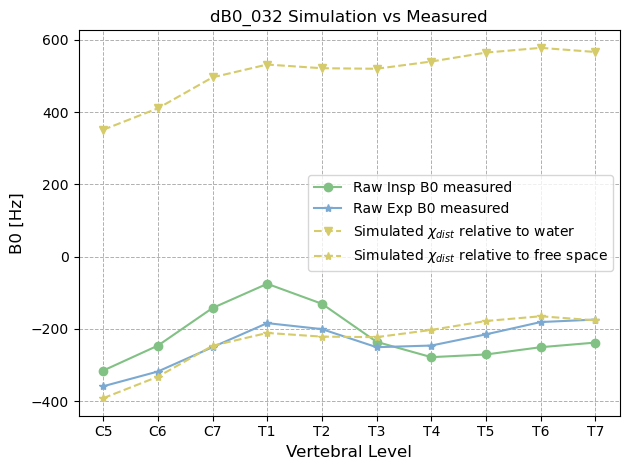

In [20]:
# With that done we can plot them:
vertebrae_levels = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14
plt.plot(vertebrae_levels, raw_insp_metrics, marker = 'o', linestyle = '-', label = "Raw Insp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, raw_exp_metrics, marker = '*', linestyle = '-', label = "Raw Exp B0 measured", color = "#7BA9D1")
plt.plot(vertebrae_levels, dmod_water_results_Hz, marker = 'v', linestyle = '--', label = r"Simulated $\chi_{dist}$ relative to water", color = "#D5CB6A")
plt.plot(vertebrae_levels, ref_zero_Hz, marker = '*', linestyle = '--', label = r"Simulated $\chi_{dist}$ relative to free space", color = "#D5CB6A")

title = "dB0_032 Simulation vs Measured"
plt.title(title)
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

#yticks = range(-450, 450, 100) 
#plt.yticks(yticks)

# Show the plot
plt.show()

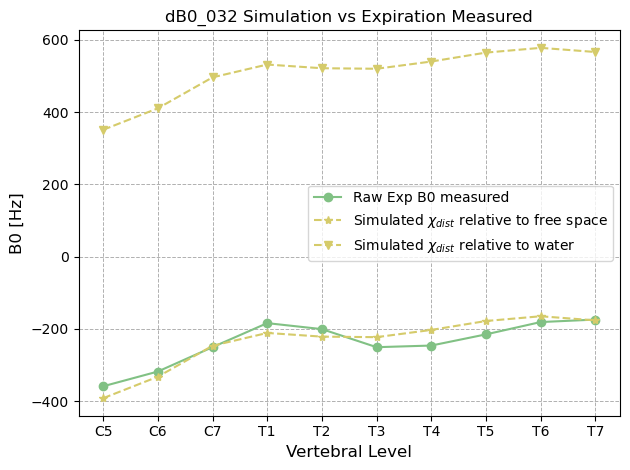

In [36]:
# With that done we can plot them:
vertebrae_levels = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
plt.plot(vertebrae_levels, raw_exp_metrics, marker = 'o', linestyle = '-', label = "Raw Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, ref_zero_Hz, marker = '*', linestyle = '--', label =  r"Simulated $\chi_{dist}$ relative to free space", color = "#D5CB6A")
plt.plot(vertebrae_levels, dmod_water_results_Hz, marker = 'v', linestyle = '--', label =  r"Simulated $\chi_{dist}$ relative to water", color = "#D5CB6A")

title = "dB0_032 Simulation vs Expiration Measured"
plt.title(title)
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

#yticks = range(100, 450, 50) 
#plt.yticks(yticks)

# Show the plot
plt.show()

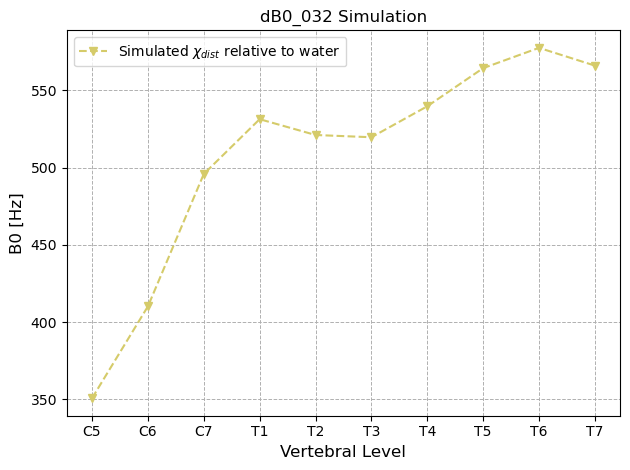

In [23]:
# With that done we can plot them:
vertebrae_levels = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14

plt.plot(vertebrae_levels, dmod_water_results_Hz, marker = 'v', linestyle = '--', label = r"Simulated $\chi_{dist}$ relative to water", color = "#D5CB6A")

title = "dB0_032 Simulation"
plt.title(title)
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()


# Show the plot
plt.show()

# <span style="color:#EC407A"> n*pi correction and plotting </span> 

In [32]:
n = 2
gamma = gamma_bar*2*np.pi
delta_TE_db032 = 5.2-3.27
freq_offset_npi = (central_freq_exp_32*n*np.pi)/(gamma*delta_TE_db032*1e-3*B0_scanner)
print(f"Frequency offset from a {n} pi wrap: ",freq_offset_npi," Hz")

Frequency offset from a 2 pi wrap:  518.1347150259068  Hz


In [33]:
two_pi_offset_corrected_exp = raw_exp_metrics + freq_offset_npi
two_pi_offset_corrected_insp = raw_insp_metrics + freq_offset_npi

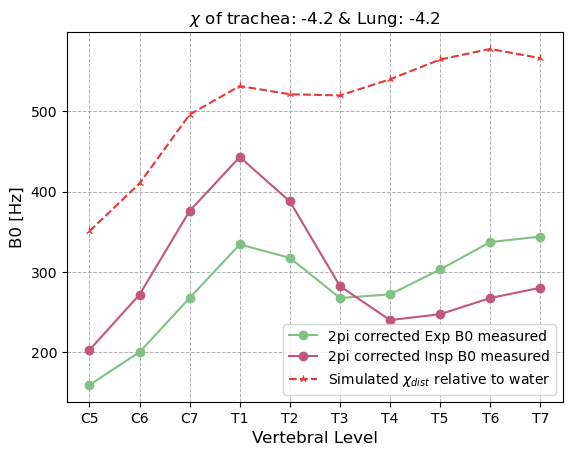

In [34]:
vertebrae_levels = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
# db0_035:
plt.plot(vertebrae_levels, two_pi_offset_corrected_exp, marker = 'o', linestyle = '-', label = "2pi corrected Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, two_pi_offset_corrected_insp, marker = 'o', linestyle = '-', label = "2pi corrected Insp B0 measured", color = "#C1577B")
#plt.plot(vertebrae_levels, abs_ref_fm_Hz_data, marker = '*', linestyle = '--', label = r"Simulated Absolute $\chi_{dist}$", color = "#5C5C5C")
plt.plot(vertebrae_levels, dmod_water_results_Hz, marker = '2', linestyle = '--', label = r"Simulated $\chi_{dist}$ relative to water", color = "#E53935")

plt.title("$\\chi$ of trachea: -4.2 & Lung: -4.2")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
#plt.tight_layout()


# Show the plot
plt.show()

### <span style="color:#C28AD1"> Average Insp and Exp </span> 

In [16]:
raw_avg_respiration = (raw_exp_metrics + raw_insp_metrics)/2
raw_avg_respiration

9   -336.934179
8   -282.016301
7   -196.287115
6   -129.552748
5   -165.474514
4   -243.122739
3   -262.002827
2   -242.828776
1   -215.741987
0   -205.949069
Name: WA(), dtype: float64

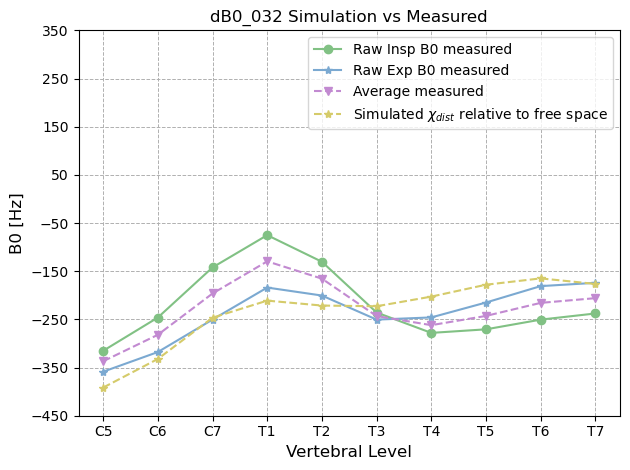

In [15]:
# With that done we can plot them:
vertebrae_levels = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14
plt.plot(vertebrae_levels, raw_insp_metrics, marker = 'o', linestyle = '-', label = "Raw Insp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, raw_exp_metrics, marker = '*', linestyle = '-', label = "Raw Exp B0 measured", color = "#7BA9D1")
plt.plot(vertebrae_levels, raw_avg_respiration, marker = 'v', linestyle = '--', label = r"Average measured", color = "#C28AD1")
plt.plot(vertebrae_levels, ref_zero_Hz, marker = '*', linestyle = '--', label = r"Simulated $\chi_{dist}$ relative to free space", color = "#D5CB6A")

title = "dB0_032 Simulation vs Measured"
plt.title(title)
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

yticks = range(-450, 450, 100) 
plt.yticks(yticks)

# Show the plot
plt.show()

In [17]:
raw_avg_respiration.to_csv("E:/msc_data/ismrm_2025/db0_032/fm/C1_meas/raw_avg_respiration.csv" , index = False, header = True)

# <span style="color:#EC407A"> Comparing raw measured </span> 

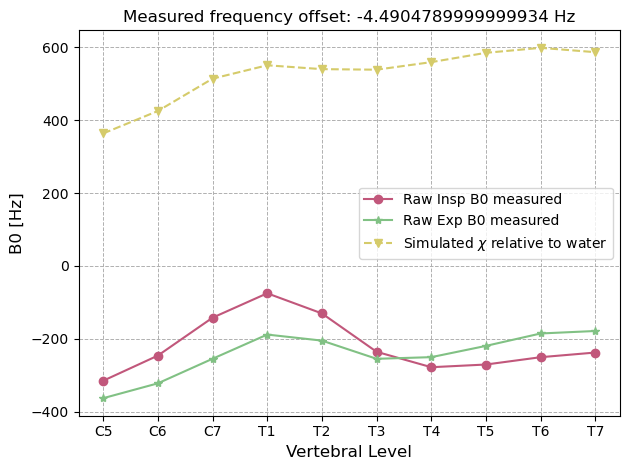

In [85]:
# With that done we can plot them:
vertebrae_levels = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
plt.plot(vertebrae_levels, raw_insp_metrics, marker = 'o', linestyle = '-', label = "Raw Insp B0 measured", color = "#C1577B")
plt.plot(vertebrae_levels, exp_dmod_water, marker = '*', linestyle = '-', label = "Raw Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, dmod_water_results_Hz, marker = 'v', linestyle = '--', label = r"Simulated $\chi$ relative to water", color = "#D5CB6A")

title = f"Measured frequency offset: {freq_offset_insp} Hz"
plt.title(title)
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

#yticks = range(100, 450, 50) 
#plt.yticks(yticks)

# Show the plot
plt.show()